# Codigo base

In [1]:
source("utils.r")

# Cargar datos

In [2]:
# Example of how to call the function
url <- "https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx?raw=true"
temp_file <- tempfile(fileext = ".xlsx")
GET(url, write_disk(temp_file, overwrite = TRUE))

# Read the `data` from the Excel file
df_trimestral_crudo <- read_excel(temp_file)

Response [https://raw.githubusercontent.com/mbarrena/tesis/refs/heads/main/data/Data%20trimestral%201950%20a%202023%20con%201%20DUMMY%20CORTA%20outliers%20(2q%203q%201989%201q1990)%20.xlsx]
  Date: 2025-03-24 21:02
  Status: 200
  Content-Type: application/octet-stream
  Size: 56.7 kB
<ON DISK>  /var/folders/59/6k0yx0n916gg1mdb04zs42rm0000gn/T//Rtmp0XUzMX/fileec582bb993f3.xlsxNULL

In [3]:
# Select specific columns and rows from df_trimestral_crudo
df_Arg <- df_trimestral_crudo |> 
  dplyr::slice(37:dplyr::n()) |>  # Equivalent to iloc[36:] (1-based index in R)
  dplyr::select(año, trimestre, ipc_ajust, E, Ebc, pbird, impp_usa, Psoja_USA, Pmaíz_USA, Ptrigo_USA, TOTfmi, D1) |>  # nolint
  as.data.frame()  # Convert to data frame (if needed)

# Rename "ipc_ajust" to "ipc"
df_Arg <- renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

# Display first 6 rows
print(head(df_Arg))

# Display first 65 rows
print(head(df_Arg, 65))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
    año trimestre          ipc            E          Ebc  pbird impp_usa
1  1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2  1959      2ºTr 3.074744e-11 8.556667e-12 8.317

In [4]:
# Copy df_Arg to df_ERPT_Arg1
df_ERPT_Arg1 <- df_Arg

# Display first rows
print(head(df_ERPT_Arg1))

# Apply logarithm to specific columns
df_ERPT_Arg1 <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg1) # nolint: line_length_linter.

# Display transformed dataframe
print(head(df_ERPT_Arg1))
print(tail(df_ERPT_Arg1))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

In [5]:
# Create df_ERPT_Arg as a copy of df_Arg
df_ERPT_Arg <- df_Arg

# Display first rows
print(head(df_ERPT_Arg))

# Apply logarithm transformation
df_ERPT_Arg <- makeLogColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display transformed dataframe
print(head(df_ERPT_Arg))

# Apply differencing transformation
df_ERPT_Arg <- makeDiffColumns(c("ipc", "E", "Ebc", "pbird", "impp_usa", "Psoja_USA", "Pmaíz_USA", "Ptrigo_USA", "TOTfmi"), df_ERPT_Arg)

# Display first and last rows
print(head(df_ERPT_Arg))
print(tail(df_ERPT_Arg, 90))

   año trimestre          ipc            E          Ebc  pbird impp_usa
1 1959      1ºTr 2.413144e-11 6.690000e-12 6.669333e-12 177276 13.23729
2 1959      2ºTr 3.074744e-11 8.556667e-12 8.317000e-12 182783 13.25134
3 1959      3ºTr 3.511185e-11 8.408333e-12 8.414333e-12 166259 13.27944
4 1959      4ºTr 3.704045e-11 8.313333e-12 8.275667e-12 178163 13.47618
5 1960      1ºTr 3.935256e-11 8.293333e-12 8.297333e-12 186316 13.50428
6 1960      2ºTr 3.948672e-11 8.300000e-12 8.313000e-12 187541 13.51833
  Psoja_USA Pmaíz_USA Ptrigo_USA TOTfmi D1
1  2.046667 1.0433333   1.736667     NA  0
2  2.106667 1.1500000   1.743333     NA  0
3  1.976667 1.1166667   1.723333     NA  0
4  1.970000 0.9856667   1.780000     NA  0
5  1.996667 1.0096667   1.800000     NA  0
6  1.996667 1.0766667   1.786667     NA  0
   año trimestre       ipc         E       Ebc    pbird impp_usa Psoja_USA
1 1959      1ºTr -24.44751 -25.73041 -25.73350 12.08546 2.583038 0.7162125
2 1959      2ºTr -24.20521 -25.48431 -25.5127

# Regresiones

[1] "LocalProjection (with exog) - signif 0.95"
    impulse response horizon   irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.36514132  -1.3651413  -1.3651413
2  impp_usa        E       2 -0.19731360  -1.0879704   0.6933432
3  impp_usa        E       3  0.04484298  -0.3120632   0.4017491
4  impp_usa        E       4 -0.02573469  -0.9352009   0.8837315
5  impp_usa        E       5  1.22513411  -0.1786363   2.6289046
6  impp_usa        E       6  1.46764191   0.2316619   2.7036219
7  impp_usa        E       7  1.16894341  -0.2286315   2.5665183
8  impp_usa        E       8  1.77301277   0.4272871   3.1187385
9  impp_usa        E       9  1.81157734   0.4807860   3.1423687
10 impp_usa        E      10  1.37234796   0.4162965   2.3283994
11 impp_usa        E      11  1.62619299   0.4733122   2.7790738
   impulse response horizon    irf_value lower_bound upper_bound
78     ipc        E       1  0.000000000  0.00000000   0.0000000
79     ipc        E       2 -0.125769085 -

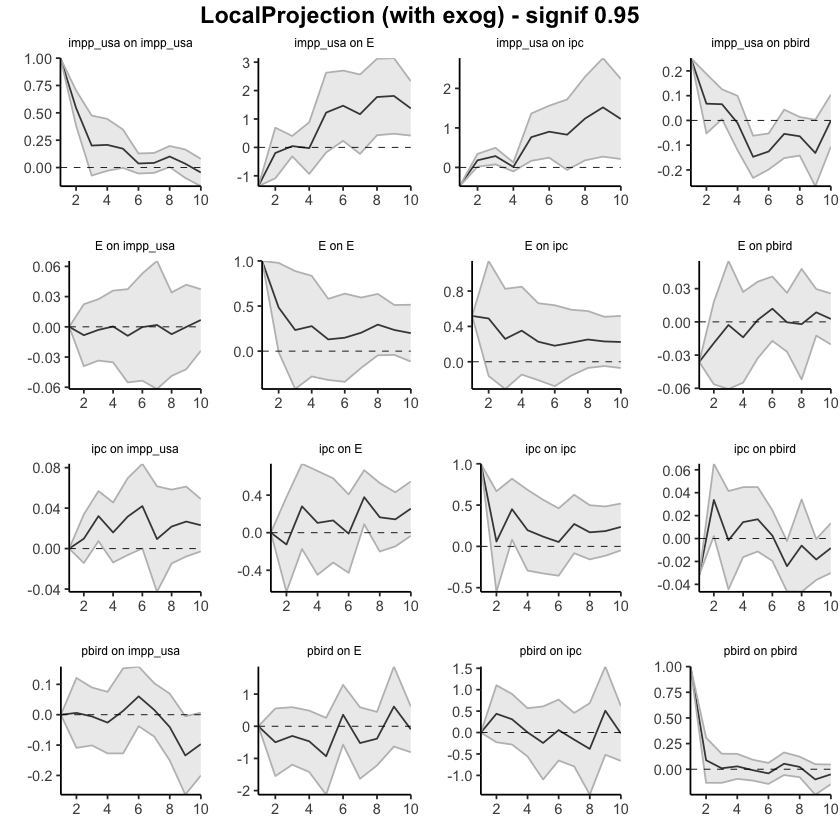

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 1, horizons=10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.3651413   -1.365141  -1.3651413
2  impp_usa        E       2 -1.5624549   -2.453112  -0.6717981
3  impp_usa        E       3 -1.5176119   -2.765175  -0.2700490
4  impp_usa        E       4 -1.5433466   -3.700376   0.6136826
5  impp_usa        E       5 -0.3182125   -3.879012   3.2425871
6  impp_usa        E       6  1.1494294   -3.647350   5.9462091
7  impp_usa        E       7  2.3183728   -3.875982   8.5127274
8  impp_usa        E       8  4.0913856   -3.448695  11.6314658
9  impp_usa        E       9  5.9029629   -2.967909  14.7738346
10 impp_usa        E      10  7.2753109   -2.551612  17.1022340
11 impp_usa        E      11  8.9015038   -2.078300  19.8813078
   impulse response horizon  irf_value lower_bound upper_bound
78     ipc        E       1  0.0000000   0.0000000   0.0000000
79     ipc        E       2 -0.1257691  -0.62

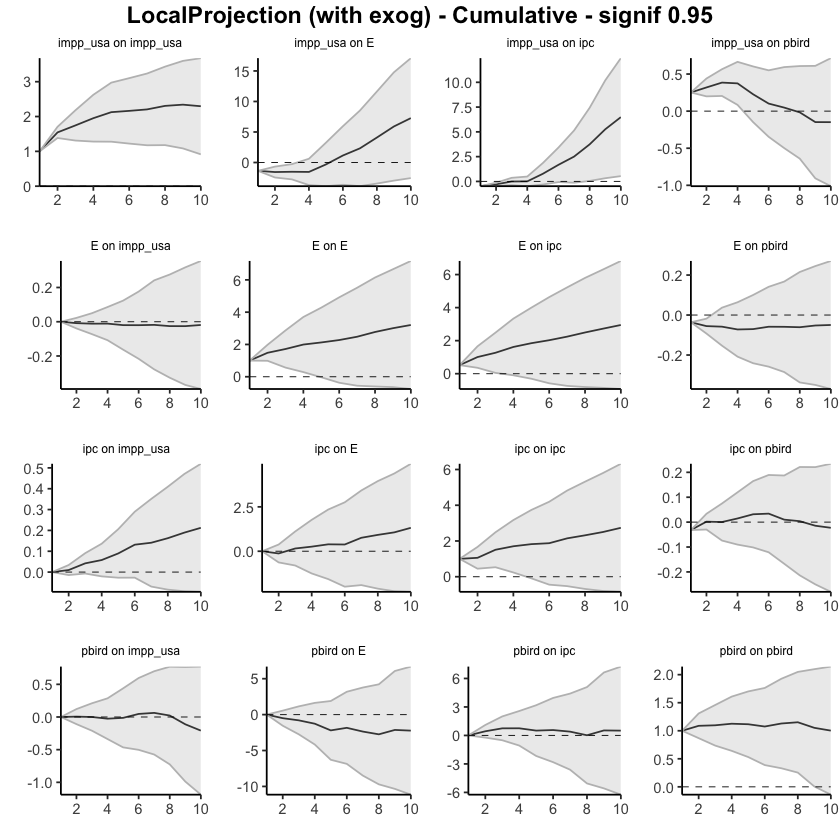

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 1, horizons=10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (without exog) - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5911110  -1.5911110  -1.5911110
2  impp_usa        E       2 -0.2528529  -1.5524185   1.0467128
3  impp_usa        E       3  0.1901257  -0.7554340   1.1356854
4  impp_usa        E       4 -0.9642976  -1.3667254  -0.5618697
5  impp_usa        E       5  0.7222281  -0.6142902   2.0587464
6  impp_usa        E       6  1.2220744   0.1165672   2.3275816
7  impp_usa        E       7  0.4163343  -0.5106648   1.3433334
8  impp_usa        E       8  1.2385506   0.2436599   2.2334412
9  impp_usa        E       9  1.5447551   0.4026443   2.6868659
10 impp_usa        E      10  0.7380275   0.1770185   1.2990365
11 impp_usa        E      11  1.1774273   0.2793007   2.0755540
   impulse response horizon  irf_value lower_bound upper_bound
78     ipc        E       1  0.0000000  0.00000000  0.00000000
79     ipc        E       2 -0.2932002 -0.75584521  0.1

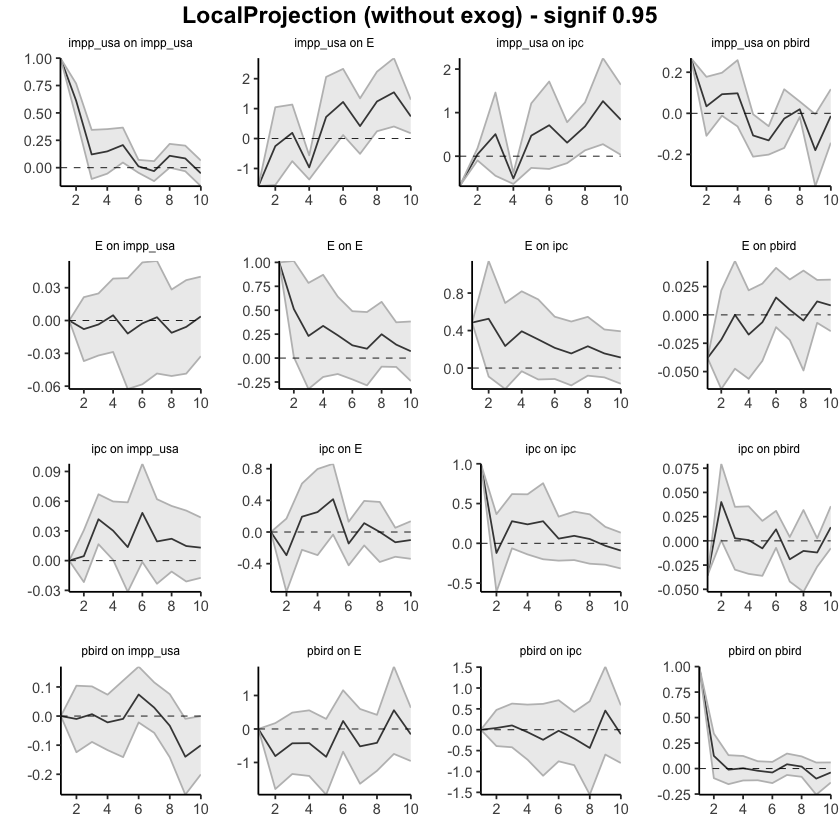

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 2, horizons=10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5416237   -1.541624  -1.5416237
2  impp_usa        E       2 -1.8060929   -2.792951  -0.8192351
3  impp_usa        E       3 -1.6613686   -3.128504  -0.1942334
4  impp_usa        E       4 -2.6695396   -4.736818  -0.6022610
5  impp_usa        E       5 -1.9285841   -4.913217   1.0560487
6  impp_usa        E       6 -0.6468762   -4.669153   3.3754004
7  impp_usa        E       7 -0.1986944   -5.300401   4.9030120
8  impp_usa        E       8  1.1198004   -5.065559   7.3051598
9  impp_usa        E       9  2.7350344   -4.741295  10.2113641
10 impp_usa        E      10  3.5326869   -4.654834  11.7202078
11 impp_usa        E      11  4.7620838   -4.471978  13.9961451
   impulse response horizon   irf_value lower_bound upper_bound
78     ipc        E       1  0.00000000   0.0000000  0.00000000
79     ipc        E       2 -0.39978659  -0

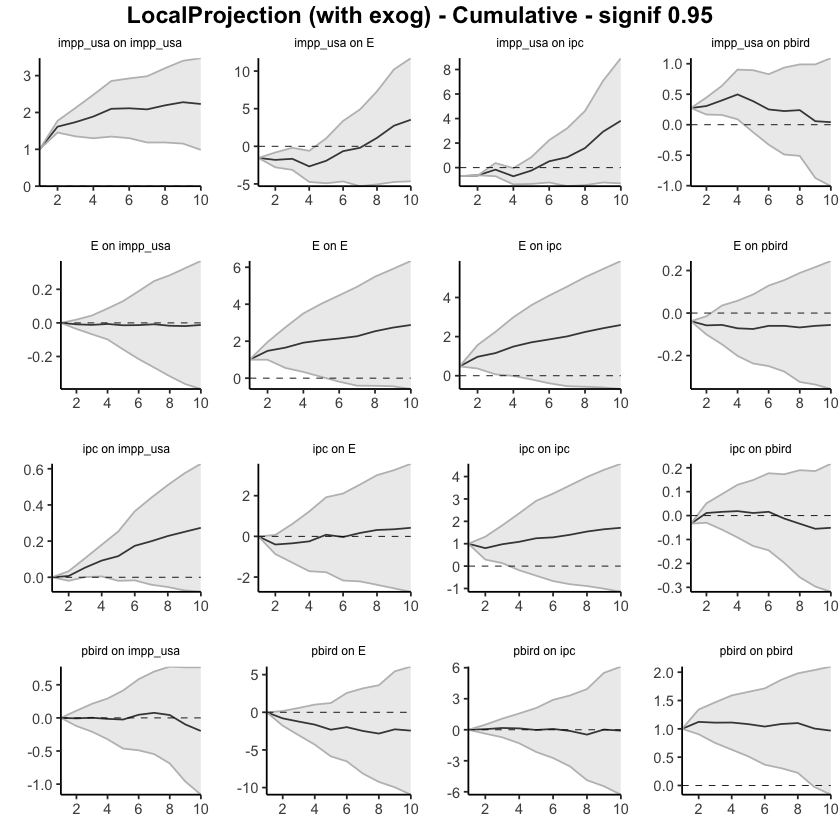

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 2, horizons=10, signif = 0.95, cumulative=TRUE)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 3, horizons=10, signif = 0.95)

[1] "LocalProjection (with exog) - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5040920 -1.50409203  -1.5040920
2  impp_usa        E       2 -0.3721212 -1.48289059   0.7386483
3  impp_usa        E       3  0.3706640 -0.48352650   1.2248546
4  impp_usa        E       4 -1.0660535 -1.91960313  -0.2125038
5  impp_usa        E       5  0.4987116 -0.59274082   1.5901640
6  impp_usa        E       6  1.2889422  0.25443054   2.3234538
7  impp_usa        E       7  0.3392456 -0.72761296   1.4061042
8  impp_usa        E       8  1.2501463  0.21842245   2.2818702
9  impp_usa        E       9  1.6130748  0.41147160   2.8146780
10 impp_usa        E      10  0.7592293  0.02612647   1.4923322
11 impp_usa        E      11  1.0146743  0.07062083   1.9587278
   impulse response horizon   irf_value lower_bound upper_bound
78     ipc        E       1  0.00000000   0.0000000  0.00000000
79     ipc        E       2 -0.42580582  -0.9016336  0.0

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("impp_usa", "E", "ipc", "pbird"), exog=c("D1"), max_lags = 3, horizons=10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
    impulse response horizon  irf_value lower_bound upper_bound
1  impp_usa        E       1 -1.5040920   -1.504092  -1.5040920
2  impp_usa        E       2 -1.8762132   -2.986983  -0.7654438
3  impp_usa        E       3 -1.5055491   -3.470509   0.4594108
4  impp_usa        E       4 -2.5716026   -5.390112   0.2469070
5  impp_usa        E       5 -2.0728910   -5.982853   1.8370710
6  impp_usa        E       6 -0.7839489   -5.728423   4.1605248
7  impp_usa        E       7 -0.4447032   -6.456035   5.5666290
8  impp_usa        E       8  0.8054431   -6.237613   7.8484992
9  impp_usa        E       9  2.4185179   -5.826141  10.6631772
10 impp_usa        E      10  3.1777472   -5.800015  12.1555094
11 impp_usa        E      11  4.1924215   -5.729394  14.1142372
   impulse response horizon   irf_value lower_bound upper_bound
78     ipc        E       1  0.00000000   0.0000000  0.00000000
79     ipc        E       2 -0.42580582  -0

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.40051319 -0.99103693   0.1900105
25     ipc        E       3  0.05883821 -0.31964180   0.4373182
26     ipc        E       4  0.09543802 -0.46647319   0.6573492
27     ipc        E       5  0.32538608 -0.02363266   0.6744048
28     ipc        E       6 -0.11228784 -0.35879230   0.1342166
29     ipc        E       7  0.19882722 -0.00240667   0.4000611
30     ipc        E       8  0.14640859 -0.14008293   0.4329001
31     ipc        E       9  0.03509054 -0.15359311   0.2237742
32     ipc        E      10  0.07215637 -0.16968862   0.3140014
33     ipc        E      11  0.15446693 -0.18517483   0.4941087
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000   0.0000000   0.0000000
46   pbird        E       2 -0.8077640  -1.8941761   0.278

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.40051319  -0.9910369   0.1900105
25     ipc        E       3 -0.34167498  -1.3106787   0.6273288
26     ipc        E       4 -0.24623696  -1.7771519   1.2846780
27     ipc        E       5  0.07914912  -1.8007846   1.9590828
28     ipc        E       6 -0.03313872  -2.1595769   2.0932994
29     ipc        E       7  0.16568849  -2.1619836   2.4933605
30     ipc        E       8  0.31209709  -2.3020665   2.9262607
31     ipc        E       9  0.34718762  -2.4556596   3.1500348
32     ipc        E      10  0.41934399  -2.6253482   3.4640362
33     ipc        E      11  0.57381091  -2.8105231   3.9581449
   impulse response horizon irf_value lower_bound upper_bound
45   pbird        E       1  0.000000    0.000000   0.0000000
46   pbird        E       2 -0.807764   -1.8941

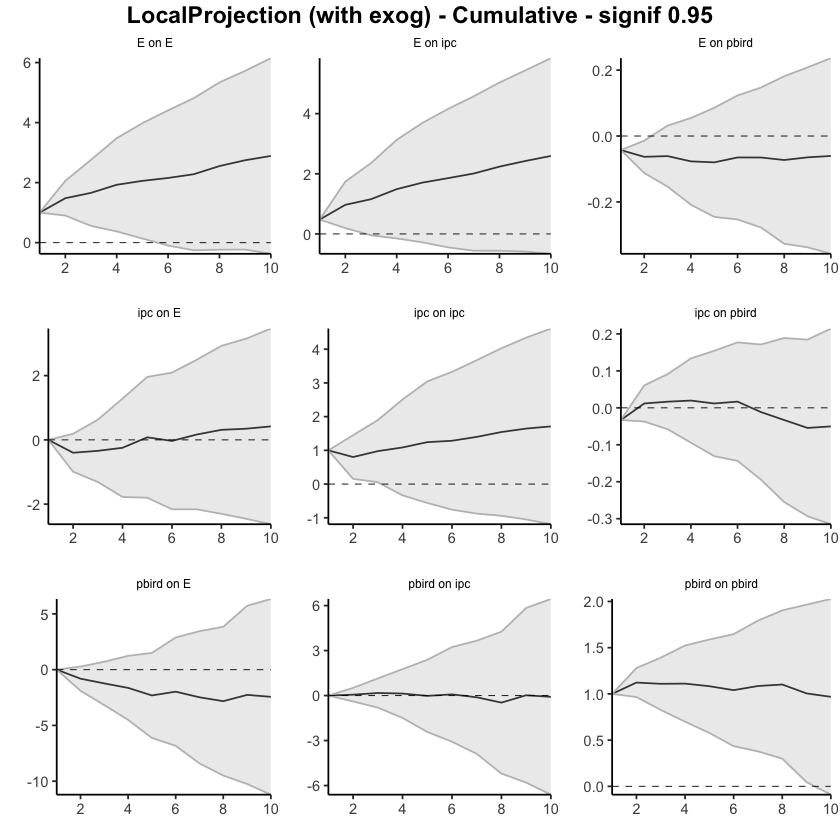

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.40051319  -0.7018008 -0.09922557
25     ipc        E       3 -0.34167498  -0.8360647  0.15271469
26     ipc        E       4 -0.24623696  -1.0273160  0.53484210
27     ipc        E       5  0.07914912  -0.8800007  1.03829897
28     ipc        E       6 -0.03313872  -1.1180562  1.05177870
29     ipc        E       7  0.16568849  -1.0218993  1.35327627
30     ipc        E       8  0.31209709  -1.0216598  1.64585401
31     ipc        E       9  0.34718762  -1.0828365  1.77721171
32     ipc        E      10  0.41934399  -1.1340704  1.97275838
33     ipc        E      11  0.57381091  -1.1528901  2.30051191
   impulse response horizon irf_value lower_bound upper_bound
45   pbird        E       1  0.000000    0.000000   0.0000000
46   pbird        E       2 -0.807764   -1.3620

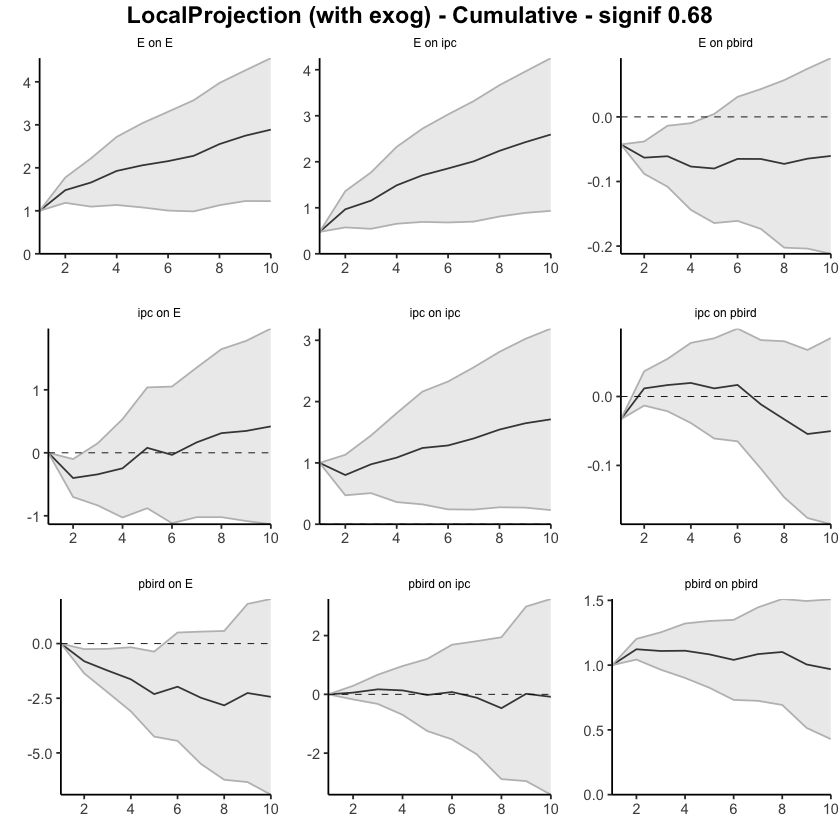

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound  upper_bound
23     ipc        E       1  0.00000000  0.00000000  0.000000000
24     ipc        E       2 -0.35768442 -0.70754102 -0.007827826
25     ipc        E       3  0.22737627  0.01061994  0.444132598
26     ipc        E       4  0.24801402 -0.13737092  0.633398970
27     ipc        E       5  0.10303840 -0.19492801  0.401004806
28     ipc        E       6 -0.27705506 -0.57923061  0.025120488
29     ipc        E       7  0.18277758 -0.09498663  0.460541796
30     ipc        E       8  0.06050843 -0.19373755  0.314754415
31     ipc        E       9 -0.08470632 -0.30607925  0.136666610
32     ipc        E      10  0.01505817 -0.25809209  0.288208421
33     ipc        E      11  0.08673609 -0.31014865  0.483620826
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.37009067  -1.

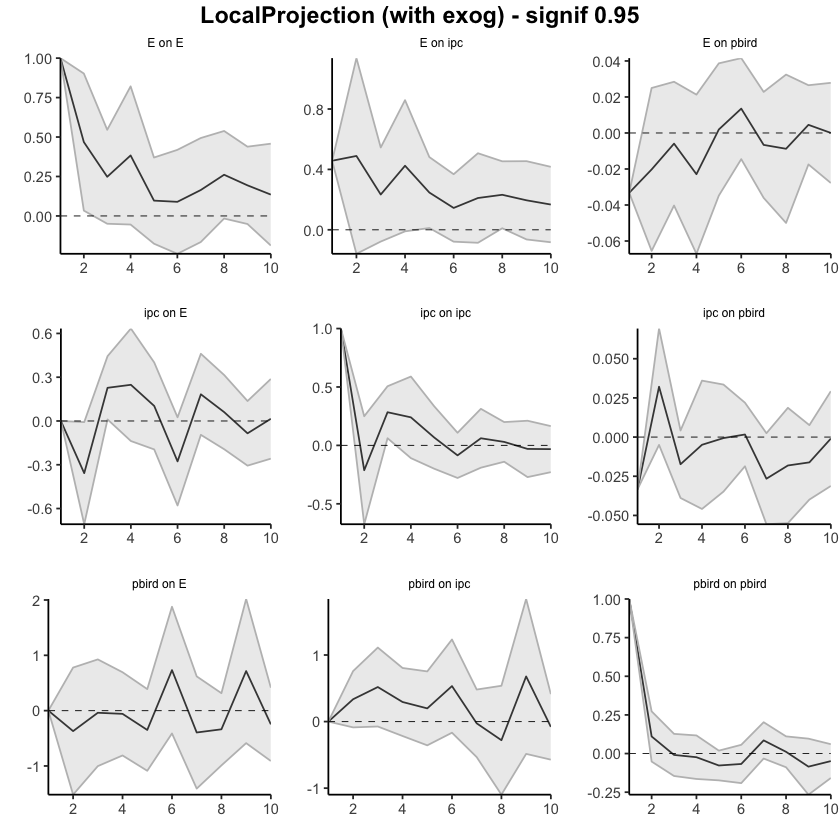

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 5, newey_lags = 10, signif = 0.95)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 5, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound  upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.000000000
24     ipc        E       2 -0.35768442  -0.7075410 -0.007827826
25     ipc        E       3 -0.13030815  -0.6969211  0.436304772
26     ipc        E       4  0.11770587  -0.8342920  1.069703742
27     ipc        E       5  0.22074427  -1.0292200  1.470708548
28     ipc        E       6 -0.05631079  -1.6084506  1.495829037
29     ipc        E       7  0.12646679  -1.7034372  1.956370832
30     ipc        E       8  0.18697523  -1.8971748  2.271125248
31     ipc        E       9  0.10226891  -2.2032540  2.407791857
32     ipc        E      10  0.11732707  -2.4613461  2.696000279
33     ipc        E      11  0.20406316  -2.7714948  3.179621105
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000    0.000000   0.0000000
46   pbird        E       2 -0.

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.35768442  -0.5361827  -0.1791862
25     ipc        E       3 -0.13030815  -0.4193964   0.1587801
26     ipc        E       4  0.11770587  -0.3680073   0.6034191
27     ipc        E       5  0.22074427  -0.4169926   0.8584811
28     ipc        E       6 -0.05631079  -0.8482189   0.7355973
29     ipc        E       7  0.12646679  -0.8071577   1.0600913
30     ipc        E       8  0.18697523  -0.8763666   1.2503171
31     ipc        E       9  0.10226891  -1.0740183   1.2785561
32     ipc        E      10  0.11732707  -1.1983225   1.4329767
33     ipc        E      11  0.20406316  -1.3140786   1.7222050
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.37009067  -0

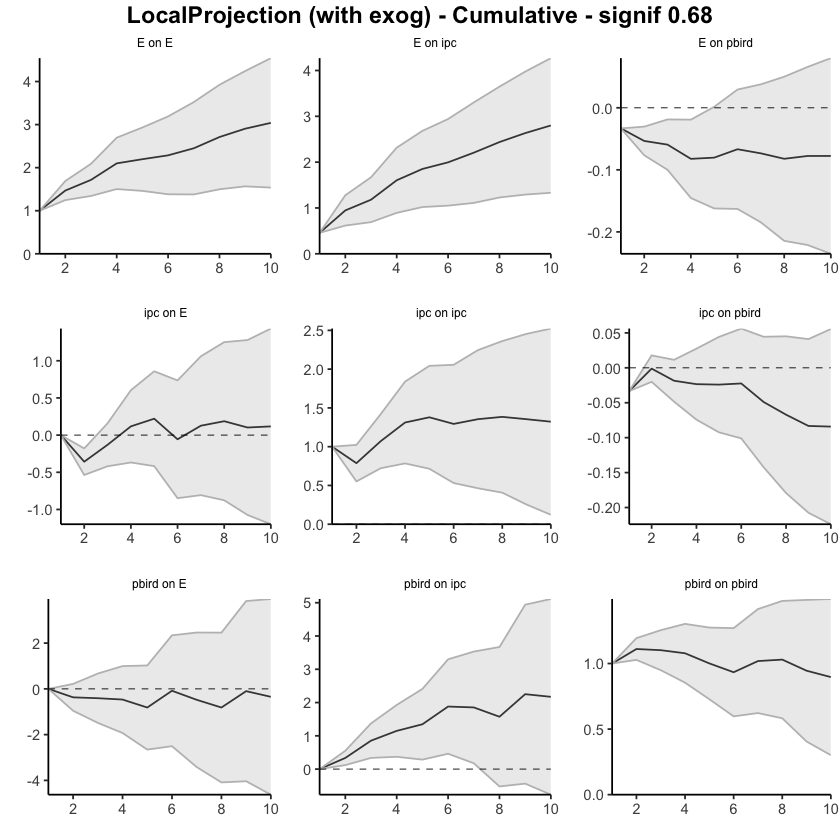

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("impp_usa", "D1"), max_lags = 5, newey_lags = 10, signif = 0.68, cumulative=TRUE)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.36433683 -0.91415225   0.1854786
25     ipc        E       3  0.09229701 -0.24917347   0.4337675
26     ipc        E       4  0.12549746 -0.46816160   0.7191565
27     ipc        E       5  0.37837224  0.06879290   0.6879516
28     ipc        E       6 -0.02674342 -0.25647594   0.2029891
29     ipc        E       7  0.27576151  0.09075161   0.4607714
30     ipc        E       8  0.21421744 -0.11357932   0.5420142
31     ipc        E       9  0.08159436 -0.13126995   0.2944587
32     ipc        E      10  0.12856552 -0.14487979   0.4020108
33     ipc        E      11  0.23650976 -0.13098583   0.6040053
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.65560978  -1.7539400   0.

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000   0.0000000
24     ipc        E       2 -0.3643368  -0.9141522   0.1854786
25     ipc        E       3 -0.2720398  -1.1633257   0.6192461
26     ipc        E       4 -0.1465424  -1.6314873   1.3384026
27     ipc        E       5  0.2318299  -1.5626944   2.0263542
28     ipc        E       6  0.2050865  -1.8191704   2.2293433
29     ipc        E       7  0.4808480  -1.7284187   2.6901147
30     ipc        E       8  0.6950654  -1.8419981   3.2321289
31     ipc        E       9  0.7766598  -1.9732680   3.5265875
32     ipc        E      10  0.9052253  -2.1181478   3.9285984
33     ipc        E      11  1.1417350  -2.2491336   4.5326037
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6556098   -1.753940   0.44

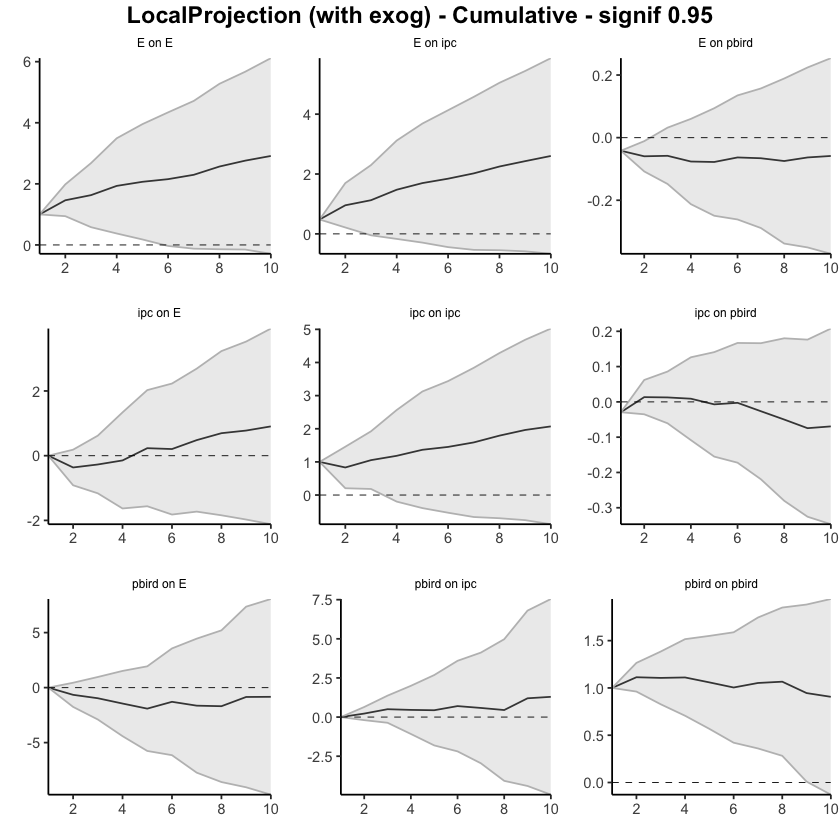

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000  0.00000000
24     ipc        E       2 -0.3643368  -0.6448549 -0.08381876
25     ipc        E       3 -0.2720398  -0.7267775  0.18269788
26     ipc        E       4 -0.1465424  -0.9041673  0.61108261
27     ipc        E       5  0.2318299  -0.6837437  1.14740349
28     ipc        E       6  0.2050865  -0.8276976  1.23787054
29     ipc        E       7  0.4808480  -0.6463289  1.60802485
30     ipc        E       8  0.6950654  -0.5993547  1.98948553
31     ipc        E       9  0.7766598  -0.6263646  2.17968413
32     ipc        E      10  0.9052253  -0.6373120  2.44776257
33     ipc        E      11  1.1417350  -0.5883000  2.87177008
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000  0.00000000
46   pbird        E       2 -0.6556098   -1.215982 -0.095

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000  0.00000000
24     ipc        E       2 -0.39169117 -0.83379684  0.05041449
25     ipc        E       3  0.13712466 -0.13863964  0.41288895
26     ipc        E       4  0.27186420 -0.11475674  0.65848513
27     ipc        E       5  0.27436727 -0.03821758  0.58695211
28     ipc        E       6 -0.12193288 -0.46247266  0.21860691
29     ipc        E       7  0.28206291  0.06190823  0.50221759
30     ipc        E       8  0.20242053 -0.09300230  0.49784335
31     ipc        E       9 -0.01522462 -0.21286647  0.18241724
32     ipc        E      10  0.06026335 -0.17337529  0.29390199
33     ipc        E      11  0.12561641 -0.18823569  0.43946852
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000   0.0000000   0.0000000
46   pbird        E       2 -0.8263808  -2.0247058   0.371

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.39169117  -0.8337968  0.05041449
25     ipc        E       3 -0.25456651  -0.9724365  0.46330345
26     ipc        E       4  0.01729768  -1.0871932  1.12178858
27     ipc        E       5  0.29166495  -1.1254108  1.70874069
28     ipc        E       6  0.16973207  -1.5878834  1.92734760
29     ipc        E       7  0.45179498  -1.5259752  2.42956519
30     ipc        E       8  0.65421551  -1.6189775  2.92740854
31     ipc        E       9  0.63899090  -1.8318440  3.10982579
32     ipc        E      10  0.69925425  -2.0052193  3.40372777
33     ipc        E      11  0.82487066  -2.1934550  3.84319629
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8263808   -2.0

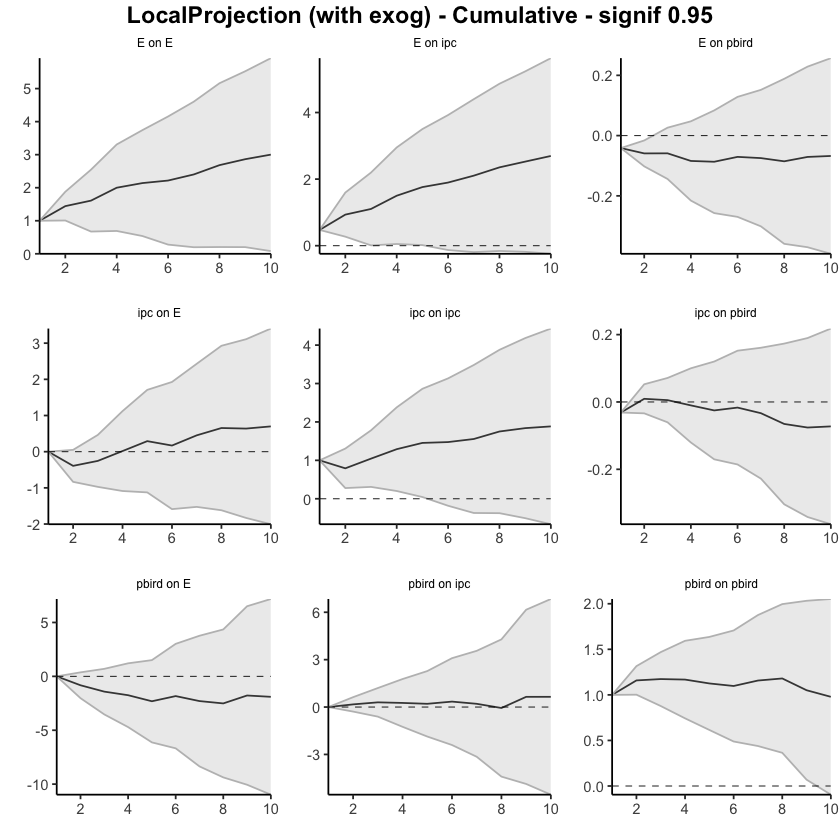

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Psoja_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000   0.0000000
24     ipc        E       2 -0.39169117  -0.6172553  -0.1661271
25     ipc        E       3 -0.25456651  -0.6208267   0.1116937
26     ipc        E       4  0.01729768  -0.5462181   0.5808134
27     ipc        E       5  0.29166495  -0.4313329   1.0146628
28     ipc        E       6  0.16973207  -0.7270105   1.0664747
29     ipc        E       7  0.45179498  -0.5572714   1.4608614
30     ipc        E       8  0.65421551  -0.5055769   1.8140079
31     ipc        E       9  0.63899090  -0.6216391   1.8996209
32     ipc        E      10  0.69925425  -0.6805792   2.0790877
33     ipc        E      11  0.82487066  -0.7150914   2.3648327
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8263808   -1.4

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.36748942 -0.91136509   0.1763862
25     ipc        E       3  0.08396835 -0.24953096   0.4174677
26     ipc        E       4  0.12941377 -0.43496389   0.6937914
27     ipc        E       5  0.39115286  0.08552468   0.6967810
28     ipc        E       6 -0.04450464 -0.26996715   0.1809579
29     ipc        E       7  0.26661987  0.06832032   0.4649194
30     ipc        E       8  0.23551063 -0.09089442   0.5619157
31     ipc        E       9  0.09940897 -0.13882648   0.3376444
32     ipc        E      10  0.14840439 -0.14178374   0.4385925
33     ipc        E      11  0.26582979 -0.12019315   0.6518527
   impulse response horizon    irf_value lower_bound upper_bound
45   pbird        E       1  0.000000000   0.0000000   0.0000000
46   pbird        E       2 -0.667537635  -1.7693320  

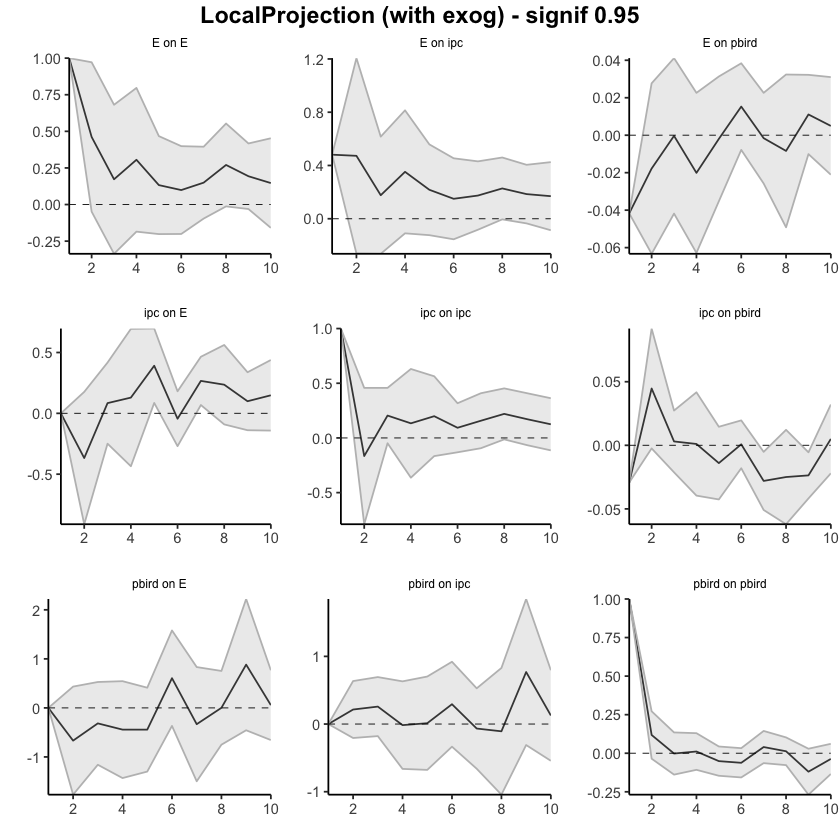

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000   0.0000000
24     ipc        E       2 -0.3674894  -0.9113651   0.1763862
25     ipc        E       3 -0.2835211  -1.1608960   0.5938539
26     ipc        E       4 -0.1541073  -1.5958599   1.2876453
27     ipc        E       5  0.2370456  -1.5103353   1.9844264
28     ipc        E       6  0.1925409  -1.7803024   2.1653842
29     ipc        E       7  0.4591608  -1.7119821   2.6303036
30     ipc        E       8  0.6946714  -1.8028765   3.1922193
31     ipc        E       9  0.7940804  -1.9417030   3.5298637
32     ipc        E      10  0.9424848  -2.0834867   3.9684563
33     ipc        E      11  1.2083146  -2.2036799   4.6203090
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6675376   -1.769332   0.43

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000  0.00000000
24     ipc        E       2 -0.3674894  -0.6449770 -0.09000184
25     ipc        E       3 -0.2835211  -0.7311614  0.16411922
26     ipc        E       4 -0.1541073  -0.8896954  0.58148078
27     ipc        E       5  0.2370456  -0.6544753  1.12856637
28     ipc        E       6  0.1925409  -0.8140118  1.19909362
29     ipc        E       7  0.4591608  -0.6485652  1.56688673
30     ipc        E       8  0.6946714  -0.5795877  1.96893055
31     ipc        E       9  0.7940804  -0.6017275  2.18988822
32     ipc        E      10  0.9424848  -0.6013782  2.48634778
33     ipc        E      11  1.2083146  -0.5324989  2.94912805
   impulse response horizon  irf_value lower_bound  upper_bound
45   pbird        E       1  0.0000000    0.000000  0.000000000
46   pbird        E       2 -0.6675376   -1.229678 -0.1

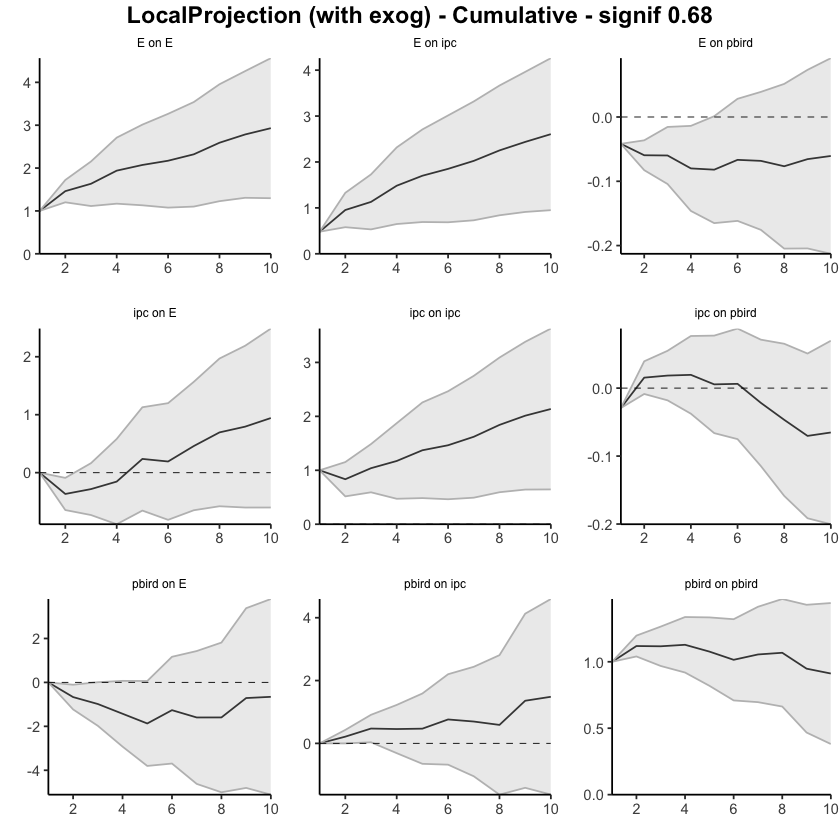

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value  lower_bound upper_bound
23     ipc        E       1  0.00000000  0.000000000  0.00000000
24     ipc        E       2 -0.39283640 -0.840968846  0.05529604
25     ipc        E       3  0.10427202 -0.174945121  0.38348916
26     ipc        E       4  0.27283243 -0.111052774  0.65671763
27     ipc        E       5  0.28489047 -0.014350434  0.58413137
28     ipc        E       6 -0.15469164 -0.482665548  0.17328228
29     ipc        E       7  0.24110230 -0.002922861  0.48512747
30     ipc        E       8  0.21303155 -0.102928253  0.52899135
31     ipc        E       9 -0.01645461 -0.240362871  0.20745365
32     ipc        E      10  0.05170877 -0.194872123  0.29828966
33     ipc        E      11  0.13282998 -0.205767079  0.47142705
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.86851537  -2.

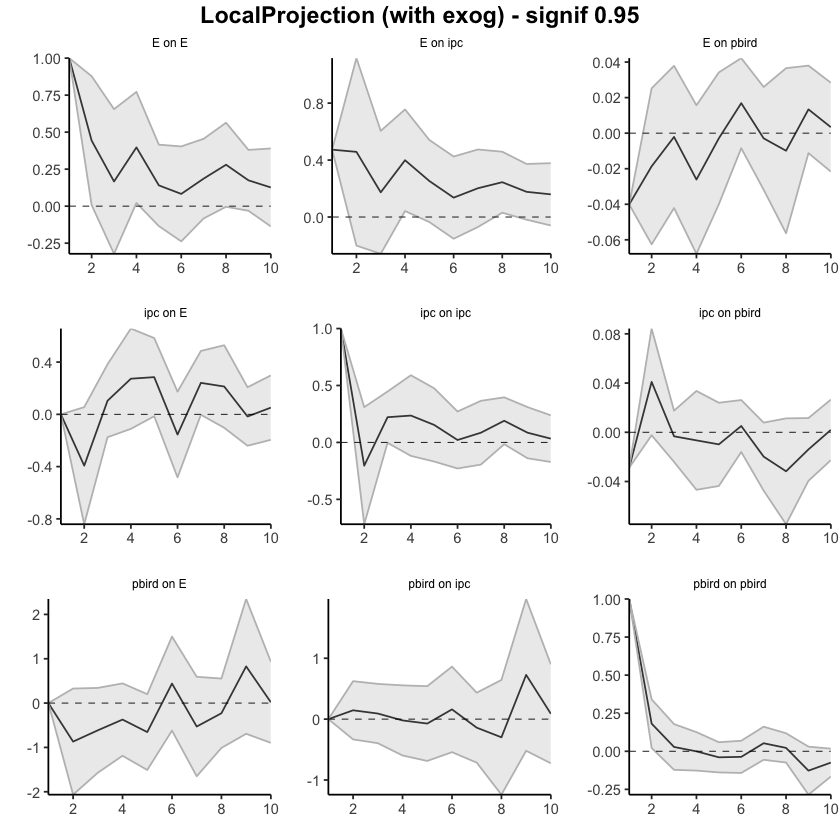

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.39283640  -0.8409688  0.05529604
25     ipc        E       3 -0.28856438  -1.0159140  0.43878520
26     ipc        E       4 -0.01573195  -1.1269667  1.09550283
27     ipc        E       5  0.26915852  -1.1413172  1.67963421
28     ipc        E       6  0.11446688  -1.6239827  1.85291649
29     ipc        E       7  0.35556919  -1.6269056  2.33804396
30     ipc        E       8  0.56860073  -1.7298338  2.86703530
31     ipc        E       9  0.55214612  -1.9701967  3.07448896
32     ipc        E      10  0.60385489  -2.1650688  3.37277862
33     ipc        E      11  0.73668488  -2.3708359  3.84420567
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8685154   -2.0

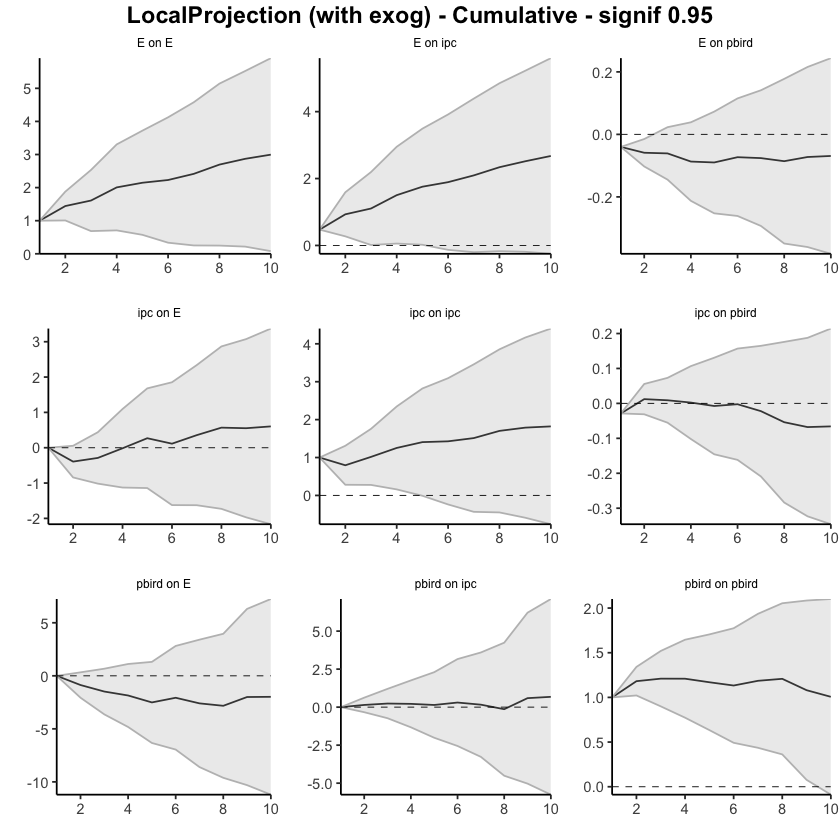

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.39283640  -0.6214754 -0.16419740
25     ipc        E       3 -0.28856438  -0.6596611  0.08253234
26     ipc        E       4 -0.01573195  -0.5826885  0.55122457
27     ipc        E       5  0.26915852  -0.4504719  0.98878897
28     ipc        E       6  0.11446688  -0.7724972  1.00143097
29     ipc        E       7  0.35556919  -0.6558975  1.36703591
30     ipc        E       8  0.56860073  -0.6040700  1.74127143
31     ipc        E       9  0.55214612  -0.7347635  1.83905573
32     ipc        E      10  0.60385489  -0.8088613  2.01657108
33     ipc        E      11  0.73668488  -0.8487849  2.32215467
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8685154   -1.4

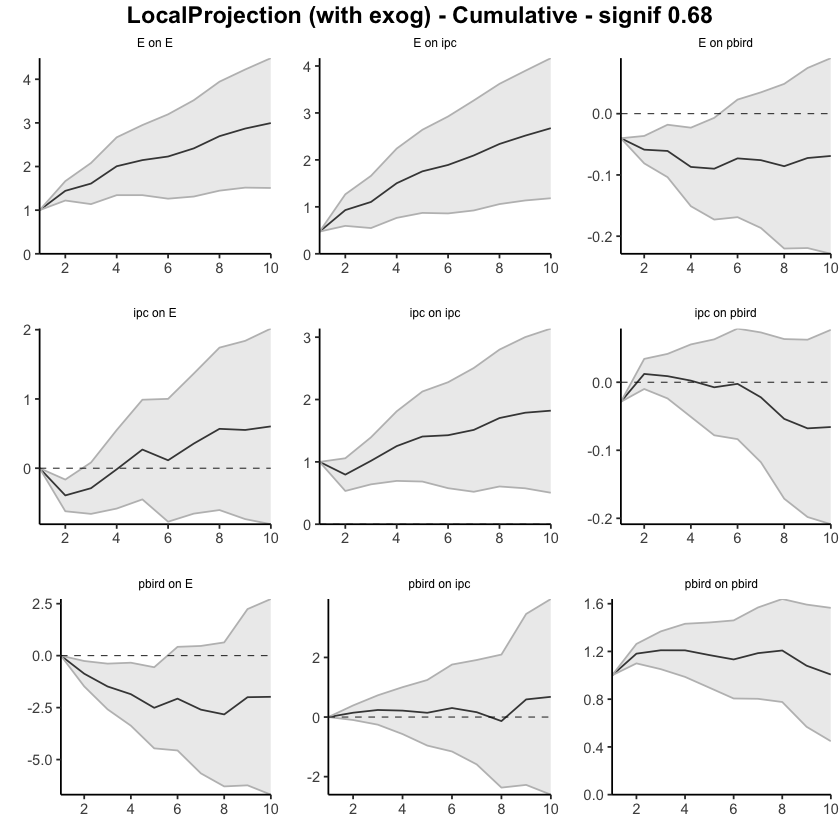

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Pmaíz_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000   0.0000000
24     ipc        E       2 -0.37338120 -0.93267413   0.1859117
25     ipc        E       3  0.07887111 -0.25114701   0.4088892
26     ipc        E       4  0.13478233 -0.43053551   0.7001002
27     ipc        E       5  0.40920870  0.11268290   0.7057345
28     ipc        E       6 -0.05476223 -0.28375650   0.1742320
29     ipc        E       7  0.26054334  0.07257653   0.4485101
30     ipc        E       8  0.24145426 -0.07100928   0.5539178
31     ipc        E       9  0.09812222 -0.12168235   0.3179268
32     ipc        E      10  0.13126852 -0.15026364   0.4128007
33     ipc        E      11  0.24529061 -0.13368607   0.6242673
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.67556908  -1.7642576   0.

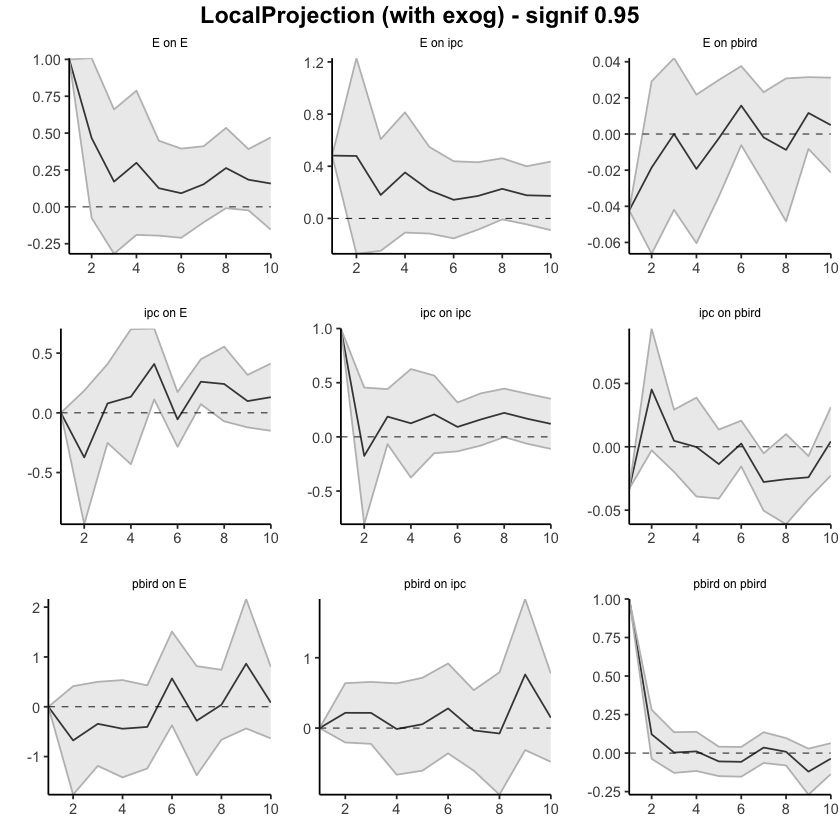

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000   0.0000000
24     ipc        E       2 -0.3733812  -0.9326741   0.1859117
25     ipc        E       3 -0.2945101  -1.1838211   0.5948010
26     ipc        E       4 -0.1597278  -1.6143567   1.2949011
27     ipc        E       5  0.2494809  -1.5016738   2.0006356
28     ipc        E       6  0.1947187  -1.7854303   2.1748677
29     ipc        E       7  0.4552620  -1.7128537   2.6233778
30     ipc        E       8  0.6967163  -1.7838630   3.1772956
31     ipc        E       9  0.7948385  -1.9055454   3.4952224
32     ipc        E      10  0.9261070  -2.0558090   3.9080231
33     ipc        E      11  1.1713976  -2.1894951   4.5322904
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.6755691   -1.764258   0.41

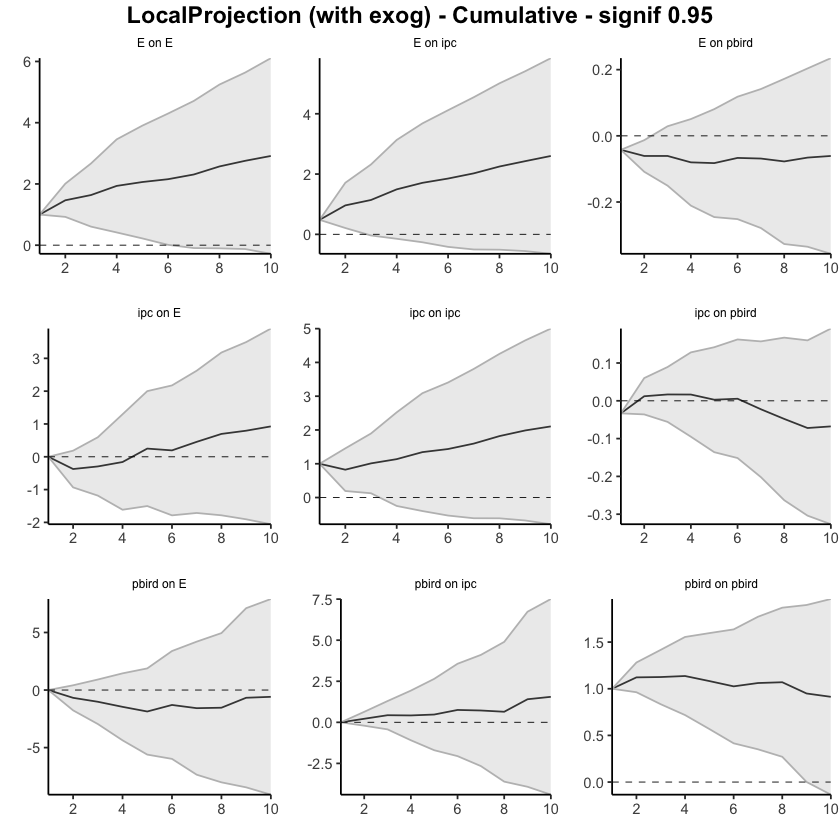

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.95, cumulative=TRUE)

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 2, newey_lags = 10, signif = 0.68, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon  irf_value lower_bound upper_bound
23     ipc        E       1  0.0000000   0.0000000  0.00000000
24     ipc        E       2 -0.3733812  -0.6587347 -0.08802767
25     ipc        E       3 -0.2945101  -0.7482402  0.15922003
26     ipc        E       4 -0.1597278  -0.9018854  0.58242984
27     ipc        E       5  0.2494809  -0.6439653  1.14292720
28     ipc        E       6  0.1947187  -0.8155614  1.20499879
29     ipc        E       7  0.4552620  -0.6509195  1.56144356
30     ipc        E       8  0.6967163  -0.5688854  1.96231799
31     ipc        E       9  0.7948385  -0.5829084  2.17258540
32     ipc        E      10  0.9261070  -0.5952787  2.44749277
33     ipc        E      11  1.1713976  -0.5433435  2.88613883
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000  0.00000000
46   pbird        E       2 -0.6755691   -1.231022 -0.120

[1] "LocalProjection (with exog) - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000  0.00000000  0.00000000
24     ipc        E       2 -0.40590191 -0.87086665  0.05906283
25     ipc        E       3  0.07396430 -0.22539482  0.37332342
26     ipc        E       4  0.25988844 -0.14208992  0.66186679
27     ipc        E       5  0.28484575 -0.02019072  0.58988221
28     ipc        E       6 -0.18845025 -0.53584323  0.15894272
29     ipc        E       7  0.18433039 -0.05976624  0.42842703
30     ipc        E       8  0.18652470 -0.12614626  0.49919567
31     ipc        E       9 -0.02034433 -0.23528103  0.19459236
32     ipc        E      10  0.03329276 -0.21291206  0.27949757
33     ipc        E      11  0.10017675 -0.22655274  0.42690623
   impulse response horizon   irf_value lower_bound upper_bound
45   pbird        E       1  0.00000000   0.0000000   0.0000000
46   pbird        E       2 -0.82056721  -2.0031715   0.

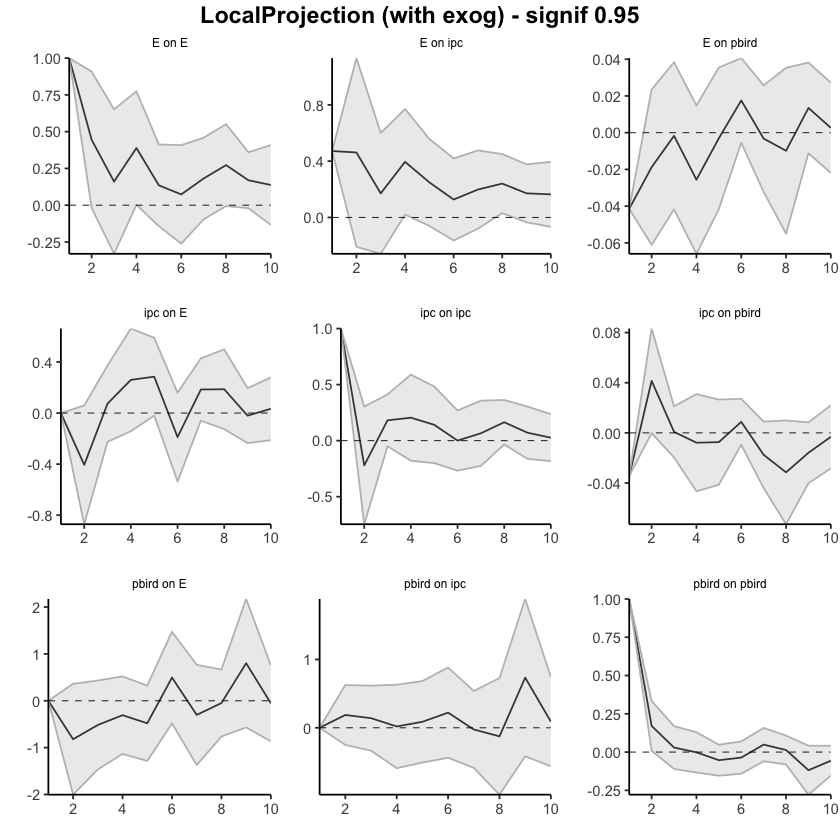

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95)

[1] "LocalProjection (with exog) - Cumulative - signif 0.95"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.40590191  -0.8708667  0.05906283
25     ipc        E       3 -0.33193762  -1.0962615  0.43238624
26     ipc        E       4 -0.07204918  -1.2383514  1.09425303
27     ipc        E       5  0.21279657  -1.2585421  1.68413525
28     ipc        E       6  0.02434632  -1.7943853  1.84307797
29     ipc        E       7  0.20867671  -1.8541516  2.27150500
30     ipc        E       8  0.39520141  -1.9802978  2.77070066
31     ipc        E       9  0.37485708  -2.2155789  2.96529303
32     ipc        E      10  0.40814984  -2.4284909  3.24479060
33     ipc        E      11  0.50832658  -2.6550437  3.67169683
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8205672   -2.0

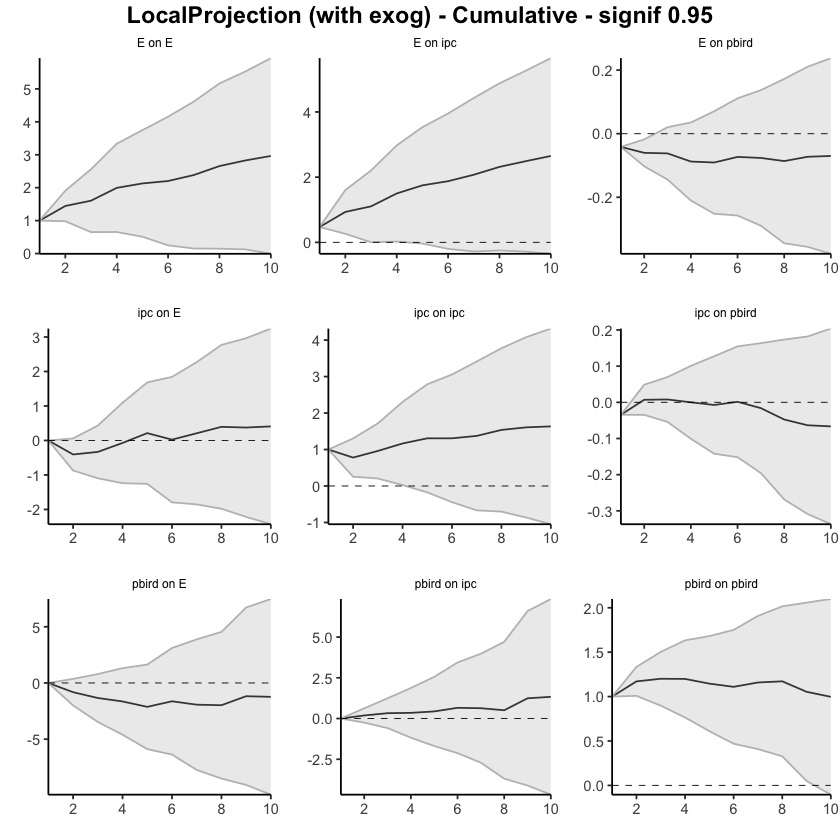

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.95, cumulative=TRUE)

[1] "LocalProjection (with exog) - Cumulative - signif 0.68"
   impulse response horizon   irf_value lower_bound upper_bound
23     ipc        E       1  0.00000000   0.0000000  0.00000000
24     ipc        E       2 -0.40590191  -0.6431288 -0.16867500
25     ipc        E       3 -0.33193762  -0.7218988  0.05802354
26     ipc        E       4 -0.07204918  -0.6671013  0.52300297
27     ipc        E       5  0.21279657  -0.5378864  0.96347957
28     ipc        E       6  0.02434632  -0.9035780  0.95227063
29     ipc        E       7  0.20867671  -0.8437867  1.26114012
30     ipc        E       8  0.39520141  -0.8167880  1.60719083
31     ipc        E       9  0.37485708  -0.9467939  1.69650807
32     ipc        E      10  0.40814984  -1.0391159  1.85541553
33     ipc        E      11  0.50832658  -1.1056378  2.12229099
   impulse response horizon  irf_value lower_bound upper_bound
45   pbird        E       1  0.0000000    0.000000   0.0000000
46   pbird        E       2 -0.8205672   -1.4

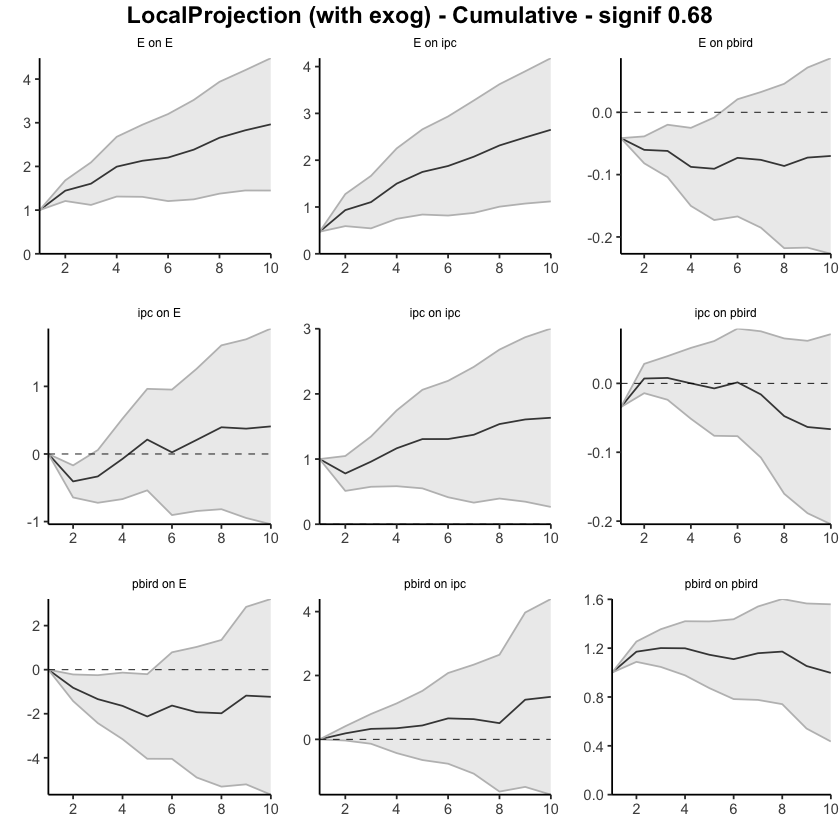

In [ ]:
res <- run_lp_model(df_ERPT_Arg, endog=c("E", "ipc", "pbird"), exog=c("Ptrigo_USA", "D1"), max_lags = 3, newey_lags = 10, signif = 0.68, cumulative=TRUE)